## Libraries

In [1]:
# Determinadas
import numpy as np
import pandas
import matplotlib.pyplot as plt

# Procesamiento de imágenes
import numpy as np
import cv2

## Load Data

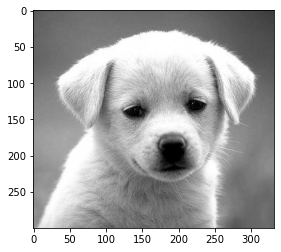

In [2]:
# Cargar imagen.
img = cv2.imread('Datasets/Img01.jpg')

# Imagen a escala de grises.
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mostrar imagen.
plt.figure()
plt.imshow(img, cmap="gray")
plt.show()

# ======= Part 1 (Histogram creation) =======

## Histogram function

In [3]:
def createHistogramArray(img):
    # Sacar la forma de la imagen.
    nrows, ncols = img.shape

    # Crear arreglo vacío de ceros.
    histValues = np.zeros(256)

    # Contar pixeles.
    for i in range(nrows):
        for j in range(ncols):
            histValues[img[i,j]] = histValues[img[i,j]] + 1
            
    return histValues

## Get values

In [4]:
# Obtener arreglo del histograma.
histValues = createHistogramArray(img)

## Show histogram

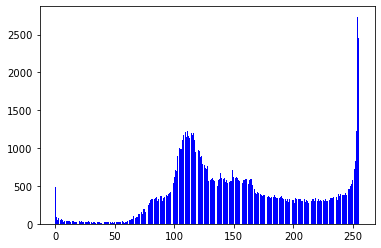

In [5]:
plt.bar(range(0,len(histValues)), histValues, color="blue")
plt.show()

# ======= Part 2 (Equalization) =======

## Equalization function

## $s(k) = \frac{L-1}{MN} \sum_{j=0}^{k} n_j$

In [6]:
def equalizeImage(img, histValues):
    # Sacar la forma de la imagen.
    nrows, ncols = img.shape
    
    # Imagen ecualizada.
    eImg = np.zeros((nrows,ncols),img.dtype)

    # Sumatoria.
    currentSum = 0

    # Espacio métrico (L-1)/M*N
    k = (len(histValues)-1) / (nrows*ncols)

    # Hacer la ecuacilización de la imagen.
    for row in range(nrows):
        for col in range(ncols):
            for pixel in range(img[row,col]):
                currentSum = currentSum + histValues[pixel]
            eImg[row,col] = k * currentSum
            currentSum = 0
            
    return eImg

## Get image equalized

In [7]:
eImg = equalizeImage(img, histValues)

## Get the equalization histogram

In [8]:
eHistValues = createHistogramArray(eImg)

## Histogram comparison

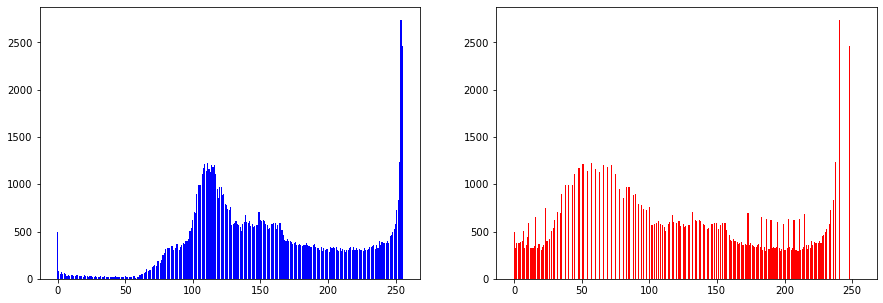

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(range(0,len(histValues)), histValues, color="blue")
plt.subplot(1,2,2)
plt.bar(range(0,len(eHistValues)), eHistValues, color="red")
plt.show()

## Image comparison

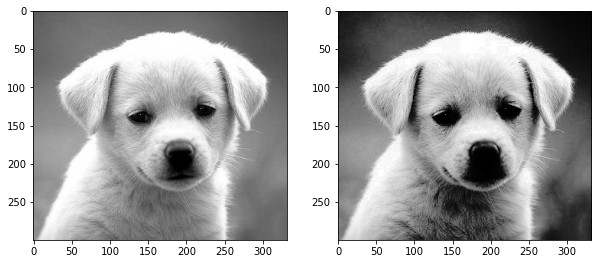

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(eImg, cmap="gray")
plt.show()